## Project: investigate-a-dataset

> **The Dataset Used is**: TMDb movie data, This data set contains information about 10,000 movies collected from The Movie Database (TMDb),



In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


## Data Wrangling

> **Tip**: in below section I investigate the dataset and I start clean it, starting from that drop some column which will not be useful in my analysis, and delete duplicate rows, and drop Na rows.



In [125]:
# Below I load the csv file and print out a few lines using head function.
df = pd.read_csv('tmdb-movies.csv', sep=',')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [126]:
df.shape

(10866, 21)

In [127]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [128]:
df.drop(['tagline','keywords','overview','homepage'], axis=1, inplace=True)

In [129]:
df['release_date'] = pd.to_datetime(df['release_date'])

In [130]:
df.drop_duplicates(inplace=True)

In [131]:
df.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
director                  44
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [132]:
df.dropna(inplace=True)

In [150]:
df['imdb_id'] = df['imdb_id'].astype(str)
df['original_title'] = df['original_title'].astype(str)
df['cast'] = df['cast'].astype(str)
df['director'] = df['director'].astype(str)
df['genres'] = df['genres'].astype(str)
df['production_companies'] = df['production_companies'].astype(str)

In [151]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9770 entries, 0 to 10865
Data columns (total 17 columns):
id                      9770 non-null int64
imdb_id                 9770 non-null object
popularity              9770 non-null float64
budget                  9770 non-null int64
revenue                 9770 non-null int64
original_title          9770 non-null object
cast                    9770 non-null object
director                9770 non-null object
runtime                 9770 non-null int64
genres                  9770 non-null object
production_companies    9770 non-null object
release_date            9770 non-null datetime64[ns]
vote_count              9770 non-null int64
vote_average            9770 non-null float64
release_year            9770 non-null int64
budget_adj              9770 non-null float64
revenue_adj             9770 non-null float64
dtypes: datetime64[ns](1), float64(4), int64(6), object(6)
memory usage: 1.3+ MB


In [134]:
df.head()

,id,imdb_id,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,2015-06-09,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,2015-05-13,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,Robert Schwentke,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,2015-03-18,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,J.J. Abrams,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,2015-12-15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,James Wan,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,2015-04-01,2947,7.3,2015,1.747999e+08,1.385749e+09



## Exploretion Data

> **Tip**: You should _not_ perform too many operations in each cell. Create cells freely to explore your data. One option .


In [136]:
# I Start explore the data below

# Below are shown The Questions:

# 1. What is Top 5 production company having highest movies 
# 2. Which Years having highest released movies, Top3 
# 3. who is the directors for that movies getting highest votes 



In [140]:
# 1. What is Top 5 production companies having highest movies 

# Note: I Used below website to plot Pie Chart
# https://pythonspot.com/matplotlib-pie-chart/

In [141]:
x = df.production_companies.value_counts()
x

Paramount Pictures                                                                                                                           156
Universal Pictures                                                                                                                           133
Warner Bros.                                                                                                                                  84
Walt Disney Pictures                                                                                                                          75
Columbia Pictures                                                                                                                             72
Metro-Goldwyn-Mayer (MGM)                                                                                                                     72
New Line Cinema                                                                                                                   

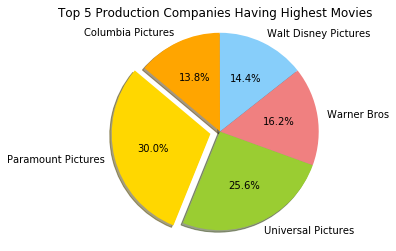

In [142]:
# Data to plot
labels = 'Paramount Pictures', 'Universal Pictures', 'Warner Bros', 'Walt Disney Pictures', 'Columbia Pictures'
sizes = [156, 133, 84, 75,72]
colors = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue','orange']
explode = (0.1, 0, 0, 0, 0)  # explode 1st slice
 
# Plot
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
autopct='%1.1f%%', shadow=True, startangle=140)
 
plt.title('Top 5 Production Companies Having Highest Movies')    
plt.axis('equal')
plt.show()

In [143]:
# 2. Which Years having highest released movies, Top3 

# Note: I Used below website to plot bar Chart
# ttps://pythonspot.com/matplotlib-bar-chart/

In [144]:
h = df.release_year.value_counts()
h

2014    635
2013    567
2015    558
2012    498
2009    472
2011    456
2008    441
2010    420
2007    389
2006    350
2005    323
2003    254
2004    253
2002    241
2001    212
1999    212
1996    196
2000    196
1998    191
1997    180
1994    174
1993    172
1995    170
1988    132
1989    128
1992    126
1990    126
1991    125
1987    113
1986    109
1985    106
1984     99
1982     80
1981     78
1983     77
1980     73
1978     61
1979     56
1971     55
1973     55
1977     55
1976     46
1966     44
1974     44
1975     42
1964     41
1970     40
1968     37
1972     37
1967     36
1963     34
1965     34
1960     32
1961     30
1962     30
1969     29
Name: release_year, dtype: int64

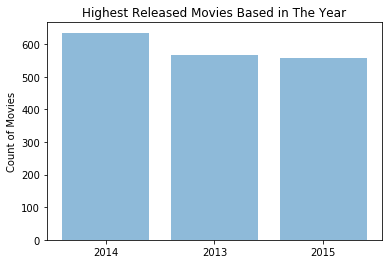

In [153]:
objects = ('2014', '2013', '2015')
y_pos = np.arange(len(objects))
performance = [635,567,558]
 
plt.bar(y_pos, performance, align='center', alpha=0.5)
plt.xticks(y_pos, objects)
plt.ylabel('Count of Movies')
plt.title('Highest Released Movies Based in The Year')
 
plt.show()

In [146]:
# 3. Who is the directors for that movies getting highest votes 

# Note: I Used below websites to plot bar Chart & Sort the value
# ttps://pythonspot.com/matplotlib-bar-chart/
# https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html

In [147]:
df.groupby('director').vote_average.mean().sort_values(ascending=False)

director
David Mallet                                                                                                      8.70
Martin Scorsese|Michael Henry Wilson                                                                              8.50
Curt Morgan                                                                                                       8.50
Saul Swimmer                                                                                                      8.50
Jorge RamÃ­rez SuÃ¡rez                                                                                            8.40
Claude Lanzmann                                                                                                   8.30
Dean Wellins                                                                                                      8.30
Sam Dunn|Scot McFadyen                                                                                            8.30
Adam Curtis                            

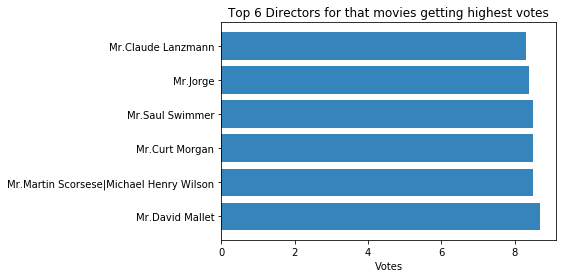

In [148]:
objects = ('Mr.David Mallet', 'Mr.Martin Scorsese|Michael Henry Wilson', 'Mr.Curt Morgan', 'Mr.Saul Swimmer', 'Mr.Jorge', 'Mr.Claude Lanzmann')
y_pos = np.arange(len(objects))
performance = [8.70,8.50,8.50,8.50,8.40,8.30]
 
plt.barh(y_pos, performance, align='center', alpha=0.9)
plt.yticks(y_pos, objects)
plt.xlabel('Votes')
plt.title('Top 6 Directors for that movies getting highest votes')
 
plt.show()

<a id='conclusions'></a>
## Conclusions



> **Tip**: Finally, in this part I will summarize my findings and the results that have been performed in this template. s

#### - Top 5 Production Companies Having Highest Movies was:
#####        1. Paramount Pictures  
#####        2. Universal Pictures 
#####        3. Warner Bros. 
#####        4. Walt Disney Pictures
#####        5. Columbia Pictures 

> 
>


#### - Highest Released Movies Based in The Year was:
#####        1. in 2014 The released movies was :: 635 Movies
#####        2. in 2013 The released movies was :: 567 Movies
#####        3. in 2015 The released movies was :: 558 Movies

> 
>


#### - Top 6 Directors for that movies getting highest votes:
#####        1. David Mallet 
#####        2. Martin Scorsese|Michael Henry Wilson
#####        3. Curt Morgan
#####        4. Saul Swimmer
#####        5. Jorge 
#####        6. Claude Lanzmann

> 
>


##### Thanks in Advance,,,

> 
>
